This file is the processing of the ADC Data for the motors in Rocksat-X 2019
This file takes the data in the DataXX_ACDCurrentReadings.dat file parsed by
RawADC2WindingCurrents.py

The Data is formatted as follows
# Timestamp (micros), CurrentPhase1 ,CurrentPhase2, CurrentPhase3

In [1]:
#Documentation variables
__author__ = 'Nicholas M Limparis'
__copyright__ = 'Copyright 2023, UMD Rocksat-X'
__credits__ = ['Nicholas M Limparis']
__license__ = '{MIT}'
__maintainer__ = 'Nicholas M Limparis'
__email__ = 'nicholas@github.limpar.is'
__status__ = 'Dev'

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.markers as mmarkers
import os
import sys

#Which data to plot
dataSet = "Data65"

In [2]:
# Here we open the files and load the data into a pandas dataframe

# Open the file for reading
#Check to see if the file exists
inputFileNameADC = "../outputData/" + dataSet + "_ADCCurrentReadings.dat"
if not os.path.isfile(inputFileNameADC): 
    sys.exit("The input file given is not a file")   
else:
    #dataFileNameList = inputFileName.split(os.sep)        #
    #dataFileNameSplit = dataFileNameList[len(dataFileNameList)-1].split(".") # This gives us the final part of the data filename string
    #dataFileName = dataFileNameSplit[0]
    pass

# We have verified that the file exists
# Now we can open it Lets start with the current data
# We will use the pandas read_csv function to read in the data

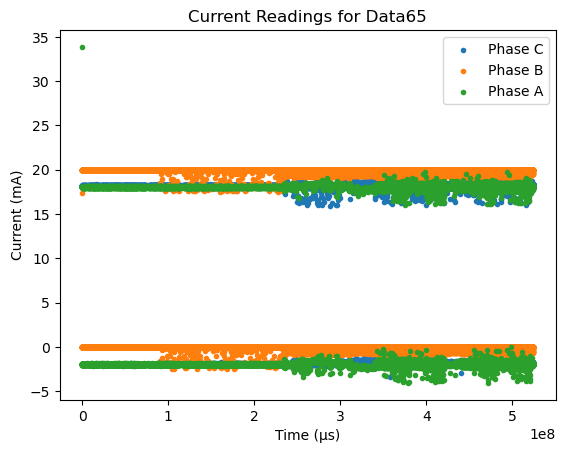

In [3]:
# Now we need to parse the current data into a pandas dataframe from inputLines
# We will use the first line as the column headers
# There are 4 Data chunks in the file separated by commas
# 1. Time stamp in ms
# 2. Current in mA of phase A
# 3. Current in mA of phase B
# 4. Current in mA of phase C


#now we need to parse the data into a pandas dataframe from the csv file
adcData = pd.read_csv(inputFileNameADC, header=0, names=['Time', 'PhaseA', 'PhaseB', 'PhaseC'])

# Now we need to plot the data
# We will plot the data in a 3x1 subplot
# The first subplot will be the current of phase A
# The second subplot will be the current of phase B
# The third subplot will be the current of phase C
#plt.scatter(adcData['Time'], adcData['PhaseA'], label='Phase A')
#plt.scatter(adcData['Time'], adcData['PhaseB'], label='Phase B')
fig, ax = plt.subplots()


ax.scatter(adcData['Time'], adcData['PhaseC'], label='Phase C', marker=".")
ax.scatter(adcData['Time'], adcData['PhaseB'], label='Phase B', marker=".")
ax.scatter(adcData['Time'], adcData['PhaseA'], label='Phase A', marker=".")


ax.set_xlabel('Time (µs)')
ax.set_ylabel('Current (mA)')
ax.set_title('Current Readings for ' + dataSet)
ax.legend()


Well this data is not very clean.... 

We need to figure out if this is the data or the parser had issues

[ ] Check to make sure that the values for current are correct
[ ] Check the conversions are correct. it almost looks like there are two data sets
[ ] The Range looks tiny so either it didn't work or bad conversions